In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



## Cross Validation with cross_val_score



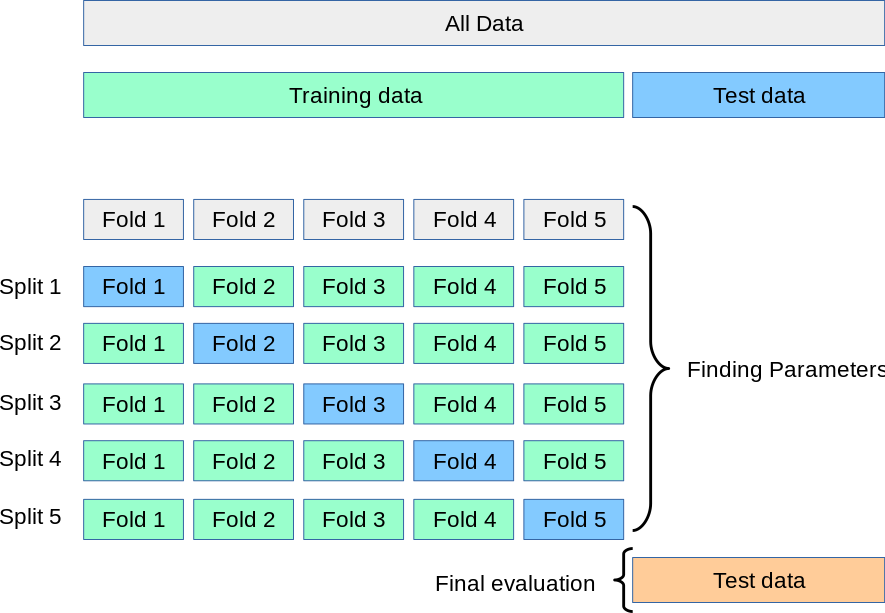

In [4]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Create Model**

In [6]:
from sklearn.linear_model import Ridge

In [7]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [10]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [11]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

8.215396464543607

**Adjust model based on metrics**

In [12]:
model = Ridge(alpha=1)

In [13]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [14]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

3.344839296530695

**Final Evaluation (Can no longer edit parameters after this!)**

In [18]:
from sklearn.metrics import mean_squared_error

In [15]:
# Need to fit the model first!
model.fit(X_train,y_train)

Ridge(alpha=1)

In [16]:
y_final_test_pred = model.predict(X_test)

In [19]:
mean_squared_error(y_test,y_final_test_pred)

2.3190215794287514